## Evaluation of geometric modelling for 

1. TECDEM: data\evaluation\TECDEM
2. SimStadt: data\evaluation\SimStadt
3. CityEnergyAnalyst: data\evaluation\cea

In [5]:
import pandas as pd
import os
import geopandas as gpd
import lxml.etree as ET
import shapely.geometry as geom
import matplotlib.pyplot as plt



In [6]:
# get data for SimStadt
files = []
df = pd.DataFrame()
for file in os.listdir(r'data\evaluation\SimStadt\18599\2020'):
    if file.endswith('.csv'):
        files.append(os.path.join(r'data\evaluation\SimStadt\18599\2020', file))


skiprows = list(range(0, 19)) + [20]

# read all files into a pandas dataframe
df_SimStadt = pd.concat((pd.read_csv(files[0],  skiprows=skiprows,
                                      sep=';', decimal=",") for file in files), ignore_index=True)

df_SimStadt.head()

,GMLId,ParentGMLId,Latitude,Longitude,X-coordinate,Y-coordinate,LOD,Year of construction,Year of refurbishment,Refurbishment Variant,...,March Heating Demand,April Heating Demand,May Heating Demand,June Heating Demand,July Heating Demand,August Heating Demand,September Heating Demand,October Heating Demand,November Heating Demand,December Heating Demand
0,DEBE3DTKxB6APGKm,DEBE3D04YY50000ImW,52.52593,13.30748,385178.71,5820882.72,LOD2,1900,NaN,Original,...,19264,3659,277,1,0,0,724,13062,30091,44411
1,DEBE3DqZlupfcbxa,DEBE3D04YY500004D7,52.52260,13.31409,385618.14,5820501.01,LOD2,2013,NaN,Original,...,12585,5116,1023,45,7,10,1540,7363,14775,20901
2,DEBE3DbXtj6PSQn3,DEBE3D04YY50000QXO,52.52538,13.30533,385031.21,5820825.01,LOD2,1900,NaN,Original,...,7408,1208,64,0,0,0,275,5249,12083,17468
3,DEBE3DQpevmnYbyH,DEBE3D04YY500005S1,52.52269,13.29917,384606.22,5820534.86,LOD2,1905,NaN,Original,...,2804,448,20,0,0,0,57,1861,5276,8192
4,DEBE3D04YY50000HmC,NaN,52.52735,13.30174,384792.47,5821049.12,LOD2,1955,NaN,Original,...,132,12,0,0,0,0,0,25,231,445


In [7]:
# get data for cea 
df_SimStadt.columns

Index(['GMLId', 'ParentGMLId', 'Latitude', 'Longitude', 'X-coordinate',
       'Y-coordinate', 'LOD', 'Year of construction', 'Year of refurbishment',
       'Refurbishment Variant', 'ALKIS code', 'PrimaryUsageZoneType',
       'PrimaryUsageZoneArea', 'SecondaryUsageZoneType',
       'SecondaryUsageZoneArea', 'BuildingType', 'Footprint area',
       'Total wall thermal area above ground',
       'Total wall thermal area below ground', 'Total outwall area',
       'Total sharedwall area', 'Total roof area', 'Gross volume',
       'Is Gross volume approximated?', 'Heated volume', 'Ridge/mean Height',
       'Eaves/mean Height', 'Storey number', 'Average Storey Height',
       'Number of households', 'Number of occupants', 'Attic Heating',
       'Basement Heating', 'Basement ceiling height above ground',
       'Surface area to volume ratio', 'Heated area', 'Mean Uvalue',
       'Specific domestic hot water demand', 'Specific space heating demand',
       'Total Yearly Heat+DHW demand', 

<Axes: >

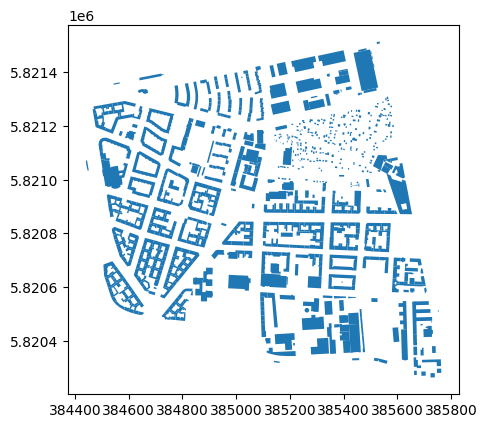

In [8]:
# get data for cea 
# Load Building level data and shape file
CEA_shape_path = os.path.join('data', 'evaluation', 'cea', 'building-geometry' ,'zone.shp')
CEA_shape = gpd.read_file(CEA_shape_path)
CEA_shape.plot()

In [9]:
CEA_shape.head()
# load building level data from TEDEM

,Name,height_ag,floors_ag,height_bg,floors_bg,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country,geometry
0,B1000,2.0,2,3.0,1,None,school,OSM - as it is,None,None,None,None,None,None,None,"POLYGON ((384874.043 5820594.084, 384873.807 5..."
1,B1001,3.0,3,3.0,1,None,service,OSM - as it is,10,Lise-Meitner-Straße,10589,None,None,Berlin,DE,"POLYGON ((385147.715 5821181.978, 385145.006 5..."
2,B1002,1.0,1,3.0,1,None,yes,OSM - as it is,None,None,None,None,None,None,None,"POLYGON ((385315.603 5820595.263, 385265.77 58..."
3,B1003,1.0,1,3.0,1,None,yes,OSM - as it is,None,None,None,None,None,None,None,"POLYGON ((385231.453 5820685.213, 385230.993 5..."
4,B1004,6.0,6,3.0,1,None,apartments,OSM - as it is,None,None,None,None,None,None,None,"POLYGON ((385092.809 5820650.44, 385096.097 58..."


In [10]:
# load building level data from TEDEM
tecdem_data = pd.read_csv(r"data\scenario_sheets\20250120_Mierendorff_detailed_dataset.csv")
tecdem_data.head()



,gml_id,groundArea,is_3D,roof_height,roof_volume,lod,function,usage,yearOfConstruction,roofType,measuredHeight,storeysAboveGround,storeyHeightsAboveGround,storeysBelowGround,storeyHeightsBelowGround,building_parts,freeWalls,allWalls,isBP
0,DEBE3D04YY500004Nu,211.651855,True,NaN,0.000,2,31001_1010,NaN,NaN,1000.0,22.432,NaN,NaN,NaN,NaN,[],4,7,False
1,DEBE3D04YY50000R3Q,218.018799,True,NaN,0.000,2,31001_1010,NaN,NaN,1000.0,22.555,NaN,NaN,NaN,NaN,[],4,6,False
2,DEBE3D04YY50000BpD,14.938477,True,NaN,0.000,2,31001_2463,NaN,NaN,1000.0,2.116,NaN,NaN,NaN,NaN,[],4,5,False
3,DEBE3D04YY50000Dkg,279.076898,True,6.721,944.133,2,31001_1010,NaN,NaN,3100.0,26.605,NaN,NaN,NaN,NaN,[],8,12,False
4,DEBE3D04YY50000NHL,66.048828,True,0.369,12.199,2,31001_2460,NaN,NaN,1000.0,2.680,NaN,NaN,NaN,NaN,[],3,6,False


In [11]:
# Filter data by what is included in scenario

dg_data = pd.read_csv(r'data\scenario_sheets\20250120_Mierendorff_Scenario.csv', sep=";")
tecdem_data = tecdem_data[tecdem_data["gml_id"].isin(dg_data["gml_id"])]

In [12]:
tecdem_data

,gml_id,groundArea,is_3D,roof_height,roof_volume,lod,function,usage,yearOfConstruction,roofType,measuredHeight,storeysAboveGround,storeyHeightsAboveGround,storeysBelowGround,storeyHeightsBelowGround,building_parts,freeWalls,allWalls,isBP
5,DEBE3D04YY50000BlO,820.155762,True,2.678,214.298,2,31001_1010,NaN,1900.0,5000.0,23.220,NaN,NaN,NaN,NaN,[],41,47,False
11,DEBE3D04YY50000Rac,0.000000,False,NaN,NaN,2,31001_1010,NaN,1905.0,NaN,NaN,NaN,NaN,NaN,NaN,"['DEBE3DplHezwKkn7', 'DEBE3DxN29nJxSsv', 'DEBE...",0,0,False
20,DEBE3D04YY50000DCT,23.834473,True,0.414,4.890,2,31001_2463,NaN,1905.0,1000.0,2.867,NaN,NaN,NaN,NaN,[],4,4,False
22,DEBE3D04YY50000Lev,196.165282,True,3.727,227.094,2,31001_1010,NaN,1905.0,9999.0,22.963,NaN,NaN,NaN,NaN,[],4,10,False
27,DEBE3D04YY500002JB,0.000000,False,NaN,NaN,2,31001_1010,NaN,1905.0,NaN,NaN,NaN,NaN,NaN,NaN,"['DEBE3DTZ1qPbmeS5', 'DEBE3DXAU7w58aAa']",0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,DEBE3D04YY50000F8S,936.446045,True,3.292,1500.767,2,31001_2120,NaN,2005.0,5000.0,7.034,NaN,NaN,NaN,NaN,[],11,15,False
3886,DEBE3D04YY50002ciJ,11.615479,True,0.517,4.207,2,51009_1610,NaN,1905.0,1000.0,2.930,NaN,NaN,NaN,NaN,[],5,7,False
3893,DEBE3D04YY50000Qwb,0.000000,False,NaN,NaN,2,31001_1010,NaN,1905.0,NaN,NaN,NaN,NaN,NaN,NaN,"['DEBE3DMBulzfbjdu', 'DEBE3DPoHWOmvcnP', 'DEBE...",0,0,False
3905,DEBE3D04YY500003sF,243.186523,True,1.357,166.432,2,31001_2143,NaN,2005.0,1000.0,5.693,NaN,NaN,NaN,NaN,[],7,8,False


<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x21653717f00>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x2165719c880>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x21657176c00>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x216571c85c0>


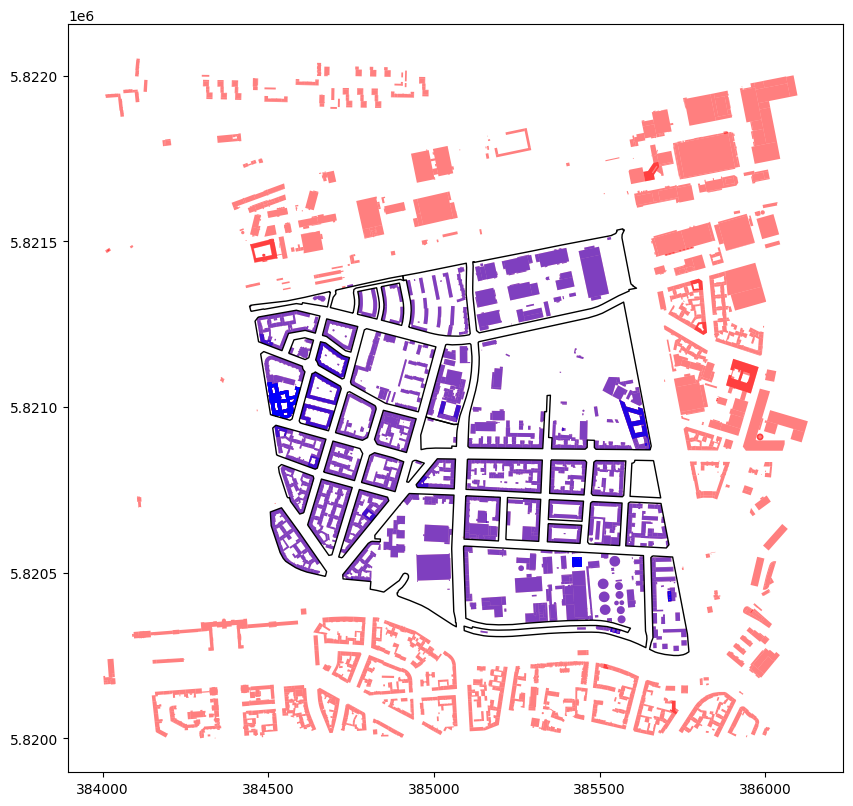

In [ ]:

# Map GML ID to CEA ID 
ns = {
    'gml': 'http://www.opengis.net/gml',
    'bldg': 'http://www.opengis.net/citygml/building/2.0',
     'bldg' :"http://www.opengis.net/citygml/building/1.0"
}
# Code taken from https://github.com/TUB-DVG/TECDEM/blob/main/experiments/92a_ModelUpdatedGML.ipynb 


gml_files = [os.path.join('data', 'examples', 'gml_data', file) for file in os.listdir(r'data\examples\gml_data') if file.endswith('.xml')]
# Extract building geometries along with their IDs

shapefile_path = os.path.join('data', 'auxillary','00_block_shape.shp')
#C:\Users\felix\Programmieren\DVG\TECDEM\data\auxillary\00_block_shape.shp
blocks_gdf = gpd.read_file(shapefile_path)

# Get the relevant blocks at the innner mierendorff Insel
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
blocks_gdf['blknr'] = blocks_gdf["blknr"].astype(str)
blocks_gdf = blocks_gdf[~blocks_gdf["blknr"].isin(outer_mierendorff)]

def extract_ground_surface_polygons_with_ids(gml_root):
    buildings = []
    for bldg in gml_root.findall('.//{*}Building', ns):
        bldg_id = bldg.get('{http://www.opengis.net/gml}id')

        for ground_surface in bldg.findall('.//{*}GroundSurface', ns):
            pos_list_elements = ground_surface.findall('.//gml:posList', ns)
            if pos_list_elements is not None:
                for geom_elem in pos_list_elements:
                    pos_list = geom_elem.text.split()
                    if len(pos_list) % 3 != 0:
                        print(f"Warning: posList does not contain triplets of coordinates: {pos_list}")
                        continue
                    try:
                        exterior_coords = []
                        interior_coords = []
                        
                        
                        exterior = ground_surface.find('.//gml:exterior//gml:posList', ns)
                        if exterior is not None:
                            exterior_pos_list = exterior.text.split()
                            exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                        
                        
                        interiors = ground_surface.findall('.//gml:interior//gml:posList', ns)
                        for interior in interiors:
                            interior_pos_list = interior.text.split()
                            interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                        
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")
            else:
                for poly in ground_surface.findall('.//gml:Polygon', ns):
                    exterior_coords = []
                    interior_coords = []
                    
                    
                    exterior = poly.find('.//gml:exterior//gml:posList', ns)
                    if exterior is not None:
                        exterior_pos_list = exterior.text.split()
                        if len(exterior_pos_list) % 3 != 0:
                            print(f"Warning: exterior posList does not contain triplets of coordinates: {exterior_pos_list}")
                            continue
                        exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                    
                   
                    interiors = poly.findall('.//gml:interior//gml:posList', ns)
                    for interior in interiors:
                        interior_pos_list = interior.text.split()
                        if len(interior_pos_list) % 3 != 0:
                            print(f"Warning: interior posList does not contain triplets of coordinates: {interior_pos_list}")
                            continue
                        interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                    
                    try:
                        # Create polygon with exterior and interior (holes)
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")

    return buildings





# Now, update the code to use the modified function
list_buildings = []
for gml_file in gml_files:
    tree = ET.parse(gml_file)
    root = tree.getroot()
    # Use the modified function that extracts only ground surfaces
    print(root)
    buildings = extract_ground_surface_polygons_with_ids(root)
    list_buildings.extend(buildings)  # Use extend to flatten the list

# Check if we have extracted any buildings
if not list_buildings:
    print("No buildings were extracted from the GML files.")
else:
    # Convert to GeoDataFrame
    buildings_gdf = gpd.GeoDataFrame(list_buildings, crs=blocks_gdf.crs)
    # Select columns using a list instead of a tuple
    columns_to_keep = ['blknr', 'plr', 'blktypname', 'ewk', 'area', 'geometry']
    blocks_gdf = blocks_gdf[columns_to_keep]
    # Check if buildings are within blocks
    buildings_gdf = buildings_gdf.reset_index(drop=True)
    blocks_gdf = blocks_gdf.reset_index(drop=True)
    within_blocks = gpd.sjoin(buildings_gdf, blocks_gdf, how='inner', predicate='intersects')


    # Optional: Plotting the results for visual inspection
    fig, ax = plt.subplots(figsize=(10, 10))
    blocks_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    buildings_gdf.plot(ax=ax, color='red', alpha=0.5)
    within_blocks.plot(ax=ax, color='blue', alpha=0.5)
    plt.show()

In [14]:
within_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1641 entries, 5 to 3396
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     1641 non-null   geometry
 1   gml_id       1641 non-null   object  
 2   index_right  1641 non-null   int64   
 3   blknr        1641 non-null   object  
 4   plr          1641 non-null   object  
 5   blktypname   1641 non-null   object  
 6   ewk          1641 non-null   object  
 7   area         1641 non-null   float64 
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 115.4+ KB


In [15]:
# spatial merge of within_blocks with data from cea

within_blocks.to_crs(CEA_shape.crs)
# Check and rename columns if necessary
if 'index_left' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_left': 'index_left_'})
if 'index_right' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_right': 'index_right_'})

"""if 'index_left' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_left': 'index_left_'})
if 'index_right' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_right': 'index_right_'})
"""
# Now perform the spatial join
within_blocks = within_blocks.to_crs(CEA_shape.crs)
merged_gdf = gpd.sjoin(within_blocks, CEA_shape, how='inner', predicate='intersects')
merged_gdf.drop_duplicates()

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
11,"POLYGON ((384656.26 5820768.208, 384657.241 58...",DEBE3D04YY50000Rac,20,020042,04300517,Block,100-999 Einwohner,17651.447266,150,B1150,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
12,"POLYGON ((384668.098 5820765.591, 384668.668 5...",DEBE3D04YY50000Rac,20,020042,04300517,Block,100-999 Einwohner,17651.447266,147,B1147,...,None,apartments,OSM - as it is,5,Kamminer Straße,10589,None,None,Berlin,DE
12,"POLYGON ((384668.098 5820765.591, 384668.668 5...",DEBE3D04YY50000Rac,20,020042,04300517,Block,100-999 Einwohner,17651.447266,150,B1150,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,"POLYGON ((385078.284 5821052.67, 385072.039 58...",DEBE3D04YY50000PWf,0,019033,04300517,Block,1-9 Einwohner,22794.015625,406,B1406,...,None,yes,OSM - as it is,5,Lise-Meitner-Straße,10589,None,None,Berlin,DE
3360,"POLYGON ((385078.284 5821052.67, 385072.039 58...",DEBE3D04YY50000PWf,0,019033,04300517,Block,1-9 Einwohner,22794.015625,237,B1237,...,None,yes,OSM - as it is,None,None,None,None,None,None,None
3391,"POLYGON ((385077.786 5821166.451, 385077.638 5...",DEBE3D00YYNv0000Bv,0,019033,04300517,Block,1-9 Einwohner,22794.015625,234,B1234,...,None,industrial,OSM - as it is,None,None,None,None,None,None,None
3392,"POLYGON ((385081.696 5821132.711, 385078.072 5...",DEBE3D00YYNv0000Bv,0,019033,04300517,Block,1-9 Einwohner,22794.015625,407,B1407,...,None,warehouse,OSM - as it is,None,None,None,None,None,None,None


In [16]:
list(merged_gdf[merged_gdf["gml_id"] == "DEBE3D04YY50000BlO"]["Name"])

['B1116', 'B1115', 'B1116', 'B1115']

<Axes: >

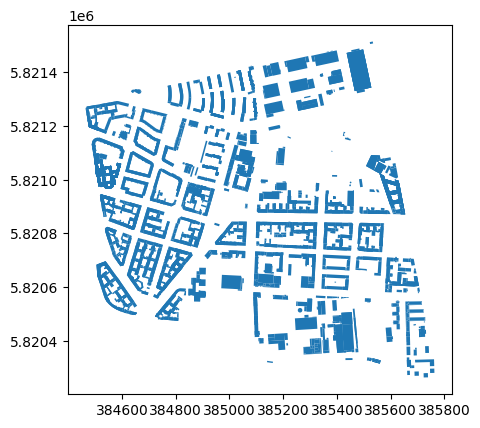

In [17]:
merged_gdf.plot()


<Axes: >

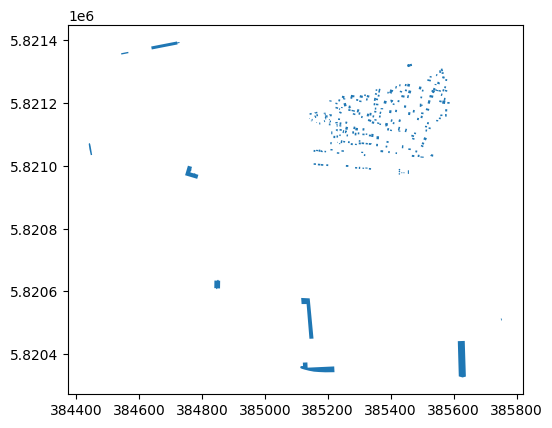

In [18]:
# Buildings only in cea
CEA_shape[~CEA_shape["Name"].isin(merged_gdf["Name"])].plot()


<Axes: >

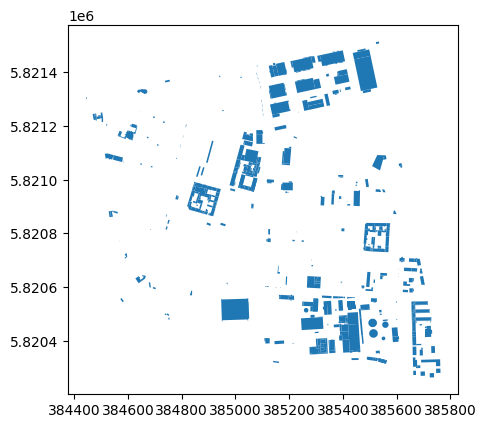

In [19]:
# Buildings not in SimStadt
SimStadt_buildings = list(df_SimStadt["GMLId"].unique())
SimStadt_buildings.extend(list(df_SimStadt["ParentGMLId"].unique()))
SimStadt_buildings.extend(list(df_SimStadt))

# Building that are NOT in Simstadt 
within_blocks[~within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

<Axes: >

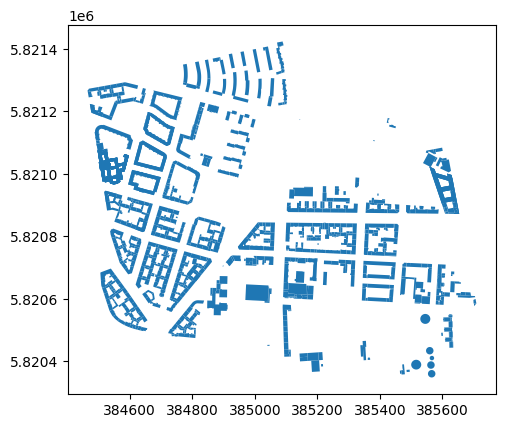

In [20]:
# Building that are Simstadt 
within_blocks[within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

In [21]:
# Figure out reasons why the buildings are not in Simstadt results
not_in_Simstadt = [x for x in within_blocks["gml_id"] if x not in SimStadt_buildings]

import re
import os

# Function to search for a GML ID in a log file
def search_gml_id_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return match.group(0)
    return None

# Directory containing the log files
log_dir = 'data/evaluation/SimStadt'

# Dictionary to store results
results = {}


# Function to search for a GML ID and its exclusion reason in a log file
def search_gml_id_and_reason_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the exclusion reason
        reason_match = re.search(r'Excluded \d+ buildings? from processing \(reason: (.+?)\)', content)
        reason = reason_match.group(1) if reason_match else "Unknown reason"
        
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return (reason, match.group(0))
    return None

# Update the loop to use the new function
for gml_id in not_in_Simstadt:
    results[gml_id] = []
    
    for filename in os.listdir(log_dir):
        if filename.endswith('.log'):
            file_path = os.path.join(log_dir, filename)
            result = search_gml_id_and_reason_in_log(file_path, gml_id)
            if result:
                results[gml_id].append((filename, *result))

# Print the updated results
for gml_id, matches in results.items():
    print(f"GML ID: {gml_id}")
    if matches:
        for filename, reason, match in matches:
            print(f"  Found in {filename}:")
            print(f"    Reason: {reason}")
            print(f"    Match: {match}")
    else:
        print("  Not found in any log file")
    print()



GML ID: DEBE3D04YY50000R2f
  Found in merged_output_DIN18599_HEATING.log:
    Reason: Building seems to be too low and has 0 storey.
    Match: DEBE3D04YY50000R2f;175,30;58,42;384743,96700;5820819,54450;-

GML ID: DEBE3D04YY50000Gm5
  Not found in any log file

GML ID: DEBE3D04YY50000Kt1
  Found in merged_output_DIN18599_HEATING.log:
    Reason: Building seems to be too low and has 0 storey.
    Match: DEBE3D04YY50000Kt1;4,37;20,77;384857,38700;5820904,37700;-

GML ID: DEBE3D00YY1Y50004P
  Found in merged_output_DIN18599_HEATING.log:
    Reason: Building seems to be too low and has 0 storey.
    Match: DEBE3D00YY1Y50004P;624,50;24,54;384740,13300;5820498,71450;-

GML ID: DEBE3D04YY50002bU7
  Found in merged_output_DIN18599_HEATING.log:
    Reason: Building seems to be too low and has 0 storey.
    Match: DEBE3D04YY50002bU7;0,79;5,90;384684,21850;5820813,98750;-

GML ID: DEBE3D04YY50000KSa
  Found in merged_output_DIN18599_HEATING.log:
    Reason: Building seems to be too low and has 0 

In [22]:
merged_gdf[merged_gdf["gml_id"].isin(tecdem_data["gml_id"])]

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
11,"POLYGON ((384656.26 5820768.208, 384657.241 58...",DEBE3D04YY50000Rac,20,020042,04300517,Block,100-999 Einwohner,17651.447266,150,B1150,...,None,apartments,OSM - as it is,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,"POLYGON ((385096.999 5821296.224, 385097.012 5...",DEBE3D04YY50000I3M,36,020691,04300517,Block,100-999 Einwohner,34357.222656,109,B1109,...,None,residential,OSM - as it is,11,Lise-Meitner-Straße,10589,None,None,Berlin,DE
3333,"POLYGON ((385096.999 5821296.224, 385097.012 5...",DEBE3D04YY50000I3M,36,020691,04300517,Block,100-999 Einwohner,34357.222656,402,B1402,...,None,residential,OSM - as it is,13,Lise-Meitner-Straße,10589,None,None,Berlin,DE
3333,"POLYGON ((385096.999 5821296.224, 385097.012 5...",DEBE3D04YY50000I3M,36,020691,04300517,Block,100-999 Einwohner,34357.222656,403,B1403,...,None,residential,OSM - as it is,15,Lise-Meitner-Straße,10589,None,None,Berlin,DE
3333,"POLYGON ((385096.999 5821296.224, 385097.012 5...",DEBE3D04YY50000I3M,36,020691,04300517,Block,100-999 Einwohner,34357.222656,404,B1404,...,None,residential,OSM - as it is,17,Lise-Meitner-Straße,10589,None,None,Berlin,DE


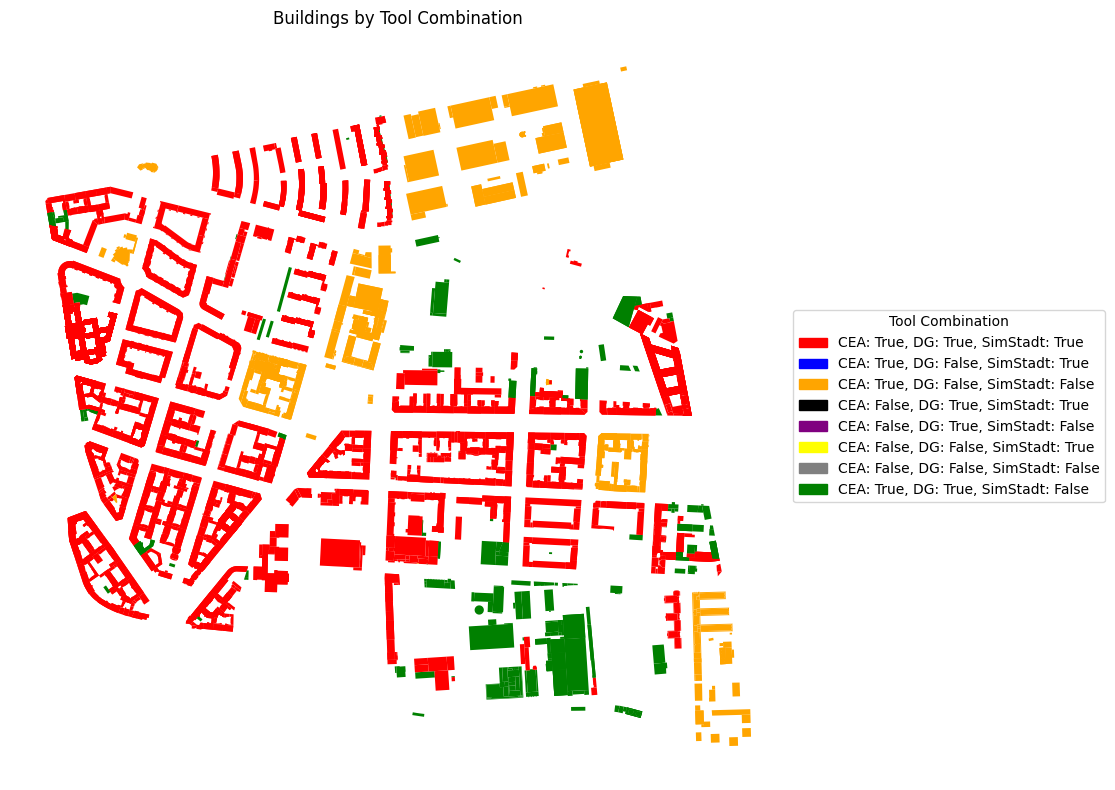

In [23]:
# Create boolean columns for each tool
merged_gdf["CEA"] = merged_gdf["Name"].isin(CEA_shape["Name"].tolist())
merged_gdf["districtgenerator"] = merged_gdf["gml_id"].isin(tecdem_data["gml_id"].tolist())
merged_gdf["SimStadt"] = merged_gdf["gml_id"].isin(SimStadt_buildings)

# Define color mapping for all possible combinations with more varied colors
color_map = {
    (True, True, True): 'red',
    
    (True, False, True): 'blue',
    (True, False, False): 'orange',
    (False, True, True): 'black',
    (False, True, False): 'purple',
    (False, False, True): 'yellow',
    (False, False, False): 'gray',
    (True, True, False): 'green',
}

# Create a new column with colors based on the combination
merged_gdf['color'] = merged_gdf.apply(lambda row: color_map[(row['CEA'], row['districtgenerator'], row['SimStadt'])], axis=1)

# Plot the GeoDataFrame using a colormap for the 'color' column
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting with color categories
merged_gdf.plot(color=merged_gdf['color'], ax=ax, legend=True)

# Customize the legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
labels = [f"CEA: {c[0]}, DG: {c[1]}, SimStadt: {c[2]}" for c in color_map.keys()]
plt.legend(handles, labels, title='Tool Combination', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Buildings by Tool Combination')
plt.axis('off')
plt.tight_layout()
plt.show()


In [24]:
# Now compare the size of the building areas 
# Start with the sum of all buildings
sum_cea = CEA_shape[CEA_shape['Name'].isin(merged_gdf['Name'])]["geometry"].area.sum()
sum_districtgenerator = tecdem_data["groundArea"].sum()
sum_SimstStadt = df_SimStadt["Footprint area"].sum()




In [25]:
sum_districtgenerator_SimStadt = tecdem_data[tecdem_data["gml_id"].isin(SimStadt_buildings)]["groundArea"].sum()
print("Sum of buildings in districtgenerator, that are are included in SimStadt:",
      sum_districtgenerator_SimStadt)

Sum of buildings in districtgenerator, that are are included in SimStadt: 51663.850798085434


In [26]:
print("Sum of ground area in Simstadt:", sum_SimstStadt)
print("Sum of ground area in DistrictGenerator:", sum_districtgenerator)
print("Sum of ground area in CEA:", sum_cea)

Sum of ground area in Simstadt: 206550.40000000002
Sum of ground area in DistrictGenerator: 67193.42728802431
Sum of ground area in CEA: 319127.065593208


In [27]:
# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
df_SimStadt.groupby(["ParentGMLId"])

In [28]:

print("Sum of heated area in Simstadt:", df_SimStadt['Heated area'].sum())
print("Sum of heated area in DistrictGenerator:", dg_data["area"].sum())
print("Sum of heated area in CEA:", sum_cea)

# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
area_df["gml_id"] = tecdem_data["gml_id"]
area_df["districtgenerator_area"] = tecdem_data["groundArea"].values
# Step 1: Group df_SimStadt by 'ParentGMLId' and sum the 'Footprint area' for each group
grouped_sum = df_SimStadt.groupby("ParentGMLId")["Footprint area"].sum()
# Step 2: Get 'Footprint area' for each GMLId directly from df_SimStadt
direct_sum = df_SimStadt.set_index("GMLId")["Footprint area"]
# Step 3: Combine the grouped sum and direct sum, aligning them by 'GMLId'
total_sum = grouped_sum.add(direct_sum, fill_value=0)
# Step 4: Reindex the combined result to match the 'gml_id' in area_df
area_df["simstadt_area"] = total_sum.reindex(area_df["gml_id"]).fillna(0).values



# Ensure both columns have the same length
assert len(area_df["districtgenerator_area"]) == len(area_df["simstadt_area"])



# Figure max difference
area_df["difference"] = abs(area_df["districtgenerator_area"] - area_df["simstadt_area"])


area_df.sort_values(["difference"], ascending=False)




area_df["factor"] = area_df.apply(lambda row: row["districtgenerator_area"] / row["simstadt_area"] if row["simstadt_area"] != 0.0 else float('nan'), axis=1)
# Remove rows with NaN factors
area_df = area_df.dropna(subset=['factor'])
# Sort the DataFrame by the 'factor' column in ascending order
area_df_sorted = area_df.sort_values('factor', ascending=True)


Sum of heated area in Simstadt: 1152177.5
Sum of heated area in DistrictGenerator: 1725438.8419709217
Sum of heated area in CEA: 319127.065593208


In [29]:
area_df_sorted

,gml_id,districtgenerator_area,simstadt_area,difference,factor
1408,DEBE3D04YY50000IUG,0.000000,608.1,608.100000,0.000000
3254,DEBE3D04YY50000FPK,0.000000,463.5,463.500000,0.000000
1101,DEBE3D04YY50000Pqq,0.000000,552.0,552.000000,0.000000
1105,DEBE3D04YY500007uo,0.000000,385.9,385.900000,0.000000
1116,DEBE3D04YY50000CE7,0.000000,280.8,280.800000,0.000000
...,...,...,...,...,...
126,DEBE3D04YY500005Oq,808.848389,794.1,14.748389,1.018572
5,DEBE3D04YY50000BlO,820.155762,795.4,24.755762,1.031124
957,DEBE3D04YY500002Cb,912.573242,757.5,155.073242,1.204717
1159,DEBE3D04YY500008YZ,6463.166992,5266.0,1197.166992,1.227339


In [30]:
# Prepare plot for geometries 
tecdem_data = pd.read_csv(r"C:\Users\felix\Programmieren\DVG\TECDEM\data\scenario_sheets\20250120_Mierendorff_Scenario.csv", sep=";")
tecdem_data.head()


,id,building,year,groundArea,area,gml_id,retrofit
0,0,AB,1900.0,820.155762,6561.246094,DEBE3D04YY50000BlO,0
1,1,AB,1905.0,687.706055,6189.354492,DEBE3D04YY50000Rac,0
2,2,IWU Transport,1905.0,23.834473,15.254062,DEBE3D04YY50000DCT,0
3,3,AB,1905.0,196.165282,1569.322254,DEBE3D04YY50000Lev,0
4,4,AB,1905.0,271.322998,2401.065185,DEBE3D04YY500002JB,0


<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x216531a5f80>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x216571c6080>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x216635fbbc0>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x21663e83a00>


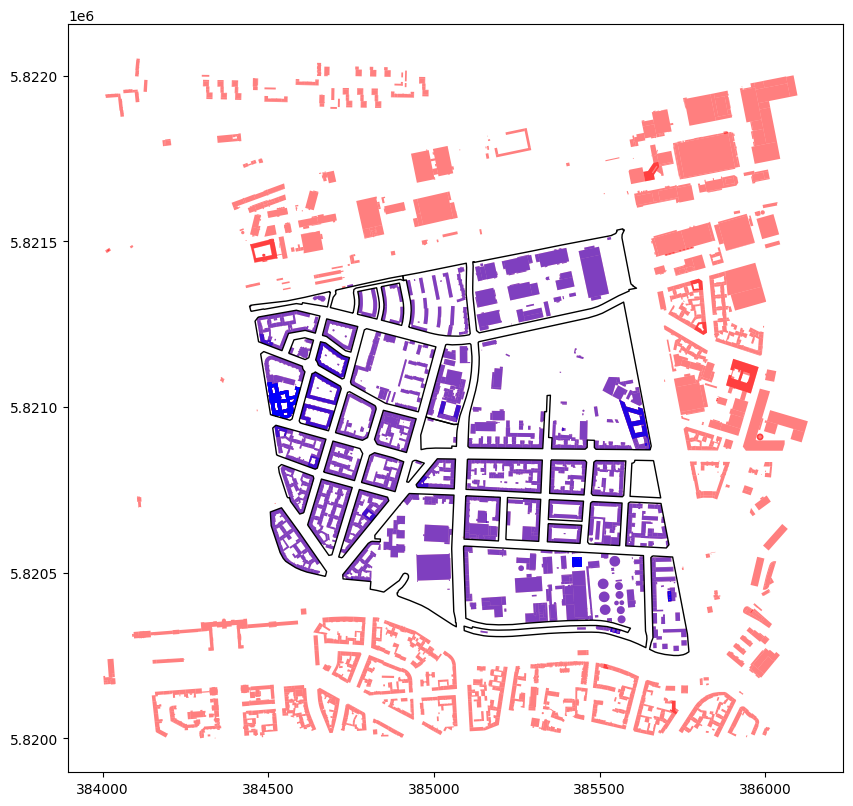

In [31]:


list_buildings = []
for gml_file in gml_files:
    tree = ET.parse(gml_file)
    root = tree.getroot()
    print(root)
    buildings = extract_ground_surface_polygons_with_ids(root)
    list_buildings.extend(buildings)


if not list_buildings:
    print("No buildings were extracted from the GML files.")
else:
    buildings_gdf = gpd.GeoDataFrame(list_buildings, crs=blocks_gdf.crs)
    columns_to_keep = ['blknr', 'plr', 'blktypname', 'ewk', 'area', 'geometry']
    blocks_gdf = blocks_gdf[columns_to_keep]
    buildings_gdf = buildings_gdf.reset_index(drop=True)
    blocks_gdf = blocks_gdf.reset_index(drop=True)
    within_blocks = gpd.sjoin(buildings_gdf, blocks_gdf, how='inner', predicate='intersects')

    fig, ax = plt.subplots(figsize=(10, 10))
    blocks_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    buildings_gdf.plot(ax=ax, color='red', alpha=0.5)
    within_blocks.plot(ax=ax, color='blue', alpha=0.5)
    plt.show()

In [32]:
# Lodas Buildings for CEA and DG
builidings_baseline_cea = gpd.read_file(r'C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\CEA\Postprocessed_CEA_model337_12\DefaultModel\2020\inputs\building-geometry\zone.shp')
buildings_benchmark_cea= gpd.read_file(r'C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\CEA\Postprocessed_CEA_model337_12\Benchmark\2020\inputs\building-geometry\zone.shp')
buildings_dg = pd.read_csv(r'C:\Users\felix\Programmieren\DVG\TECDEM\data\scenario_sheets\20250120_Mierendorff_Scenario.csv', sep=';')

In [38]:
buildings_dg.head()

,id,building,year,groundArea,area,gml_id,retrofit
0,0,AB,1900.0,820.155762,6561.246094,DEBE3D04YY50000BlO,0
1,1,AB,1905.0,687.706055,6189.354492,DEBE3D04YY50000Rac,0
2,2,IWU Transport,1905.0,23.834473,15.254062,DEBE3D04YY50000DCT,0
3,3,AB,1905.0,196.165282,1569.322254,DEBE3D04YY50000Lev,0
4,4,AB,1905.0,271.322998,2401.065185,DEBE3D04YY500002JB,0


<Axes: >

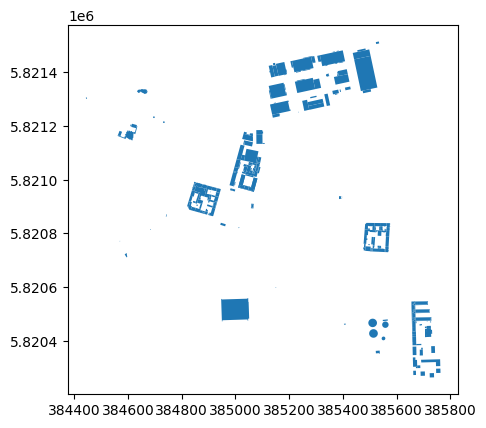

In [ ]:
# Compare area of buildings-gdf with simulated data
within_blocks[~within_blocks["gml_id"].isin(buildings_dg["gml_id"])].plot()

In [42]:
# Create a comparison dataframe of areas between within_blocks and buildings_dg
area_comparison = pd.DataFrame()

area_comparison['gml_id'] = within_blocks['gml_id']
area_comparison['districtgenerator_area'] = within_blocks.geometry.area


buildings_dg_areas = buildings_dg[['gml_id', 'groundArea']].rename(columns={'groundArea': 'simulated_area'})
area_comparison = area_comparison.merge(buildings_dg_areas, on='gml_id', how='left')

# Calculate differences and ratios
area_comparison['difference'] = area_comparison['districtgenerator_area'] - area_comparison['simulated_area']
area_comparison['factor'] = area_comparison['districtgenerator_area'] / area_comparison['simulated_area']

# Sort by factor to see largest discrepancies
area_comparison = area_comparison.sort_values('factor')

print(area_comparison)


                  gml_id  districtgenerator_area  simulated_area   difference  \
1036  DEBE3D04YY500002TA                1.371879     5783.542239 -5782.170360   
1034  DEBE3D04YY500002TA                1.514211     5783.542239 -5782.028028   
1157  DEBE3D04YY500003kD                3.658982     4497.759760 -4494.100778   
535   DEBE3D04YY500009pj                4.536040     5507.606445 -5503.070405   
722   DEBE3D04YY500003fU                5.857459     6789.085693 -6783.228235   
...                  ...                     ...             ...          ...   
1636  DEBE3D04YY500005p2               49.738787             NaN          NaN   
1637  DEBE3D04YY50000PWf              101.638361             NaN          NaN   
1638  DEBE3D00YYNv0000Bv              414.715905             NaN          NaN   
1639  DEBE3D00YYNv0000Bv              766.445583             NaN          NaN   
1640  DEBE3D04YY50002cJh               29.052946             NaN          NaN   

        factor  
1036  0.00

<Axes: >

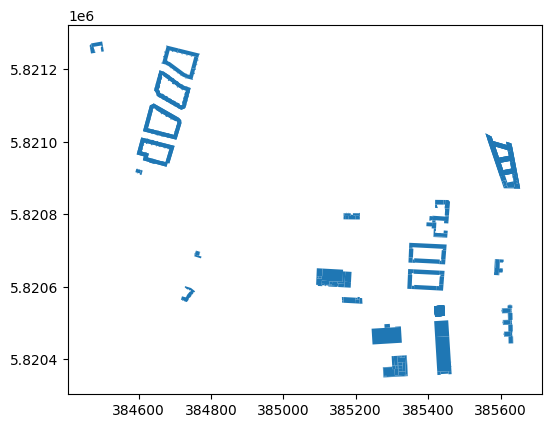

In [45]:
# Get the 100 smallest factors from area_comparison
smallest_factors = area_comparison.nsmallest(100, 'factor')['gml_id']

# Plot only buildings with smallest factors
within_blocks[within_blocks['gml_id'].isin(smallest_factors)].plot()

<Axes: >

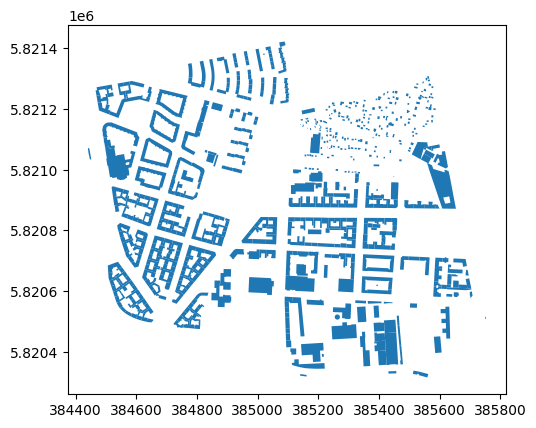

In [39]:
# TODO 
# Export plots of buildings
# No Axes
buildings_benchmark_cea.plot()